# Perceptrón: Practical case II

## Dataset

The MNIST database (modified database of the National Institute of Standards and Technology) is a large database of handwritten digits that is commonly used for training of various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "remixing" the samples from the original NIST data sets. The creators considered that since the NIST training dataset was taken from U.S. Census Bureau employees, while the test dataset was taken from U.S. high school students, it wasn't very suitable for machine learning experiments. Additionally, the NIST black and white images were normalized to fit a 28x28 pixel bounding box, introducing grayscale levels.

The MNIST database contains 60,000 training images and 10,000 test images. Half of the training set and half of the test set were taken from the NIST training data set, while the other half of the training set and the other half of the test set were taken from the test data set. The original creators of the database maintain a list of some of the methods tested on it. In their original paper, they use a vector support machine to get an error rate of 0.8%. An expanded dataset similar to the MNIST called EMNIST was published in 2017, containing 240,000 training images and 40,000 test images of handwritten digits and characters.

## Statement

In this practical exercise we are going to use the Perceptron to solve a more complex problem than the previous one. In this case, our objective will be to classify a set of images based on the number shown in them.

## 1. Reading the data set

In [29]:
# We import the dataset
from sklearn.datasets import fetch_openml

# We add as_frame = False to force the return of an array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [30]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
28*28

784

## 2. Dataset visualization

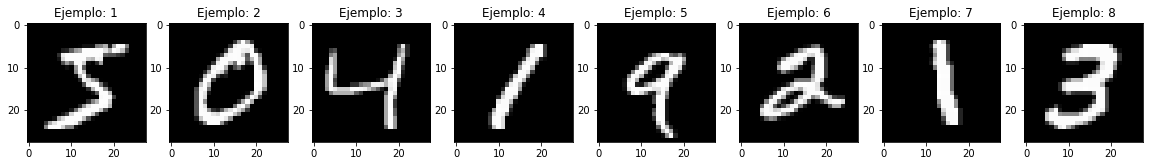

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [43]:
# Converting the dataset to a Pandas DataFrame
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Dataset division

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

## 4. Algorithm training

In [45]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)
# 784 input features

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [46]:
# Number of parameters that make up the model
clf.coef_.shape

(10, 784)

In [47]:
# Bias / intercept parameters
clf.intercept_

array([-1686.,  -510., -1453., -2750., -1200.,  1474., -3055.,  -247.,
       -6799., -5123.])

## 5. Prediction with the test suite

In [48]:
# We perform the prediction with the test data set
y_pred = clf.predict(X_test)

In [49]:
len(y_test)

7000

In [50]:
# We show the f1_score resulting from the classification
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8774556164026485

## 6. Showing misclassified images

In [51]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

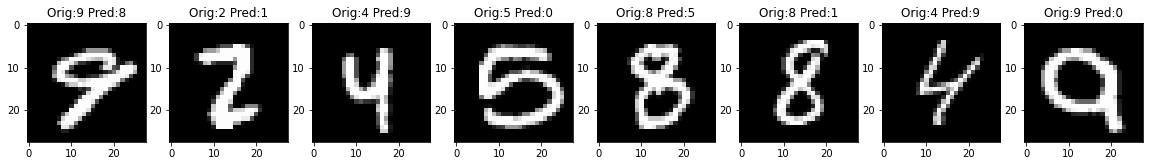

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()